In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_1654342.csv')

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type
0,1,06/08/2023,17:41:54,1.0,2,Groningen,3.25,Tea,Chai tea
1,2,06/10/2023,11:30:46,2.0,2,Groningen,4.50,Chocolate,Hot chocolate
2,3,06/06/2023,09:19:26,3.0,2,Groningen,3.00,Tea,Black tea
3,4,06/10/2023,17:25:49,1.0,3,Breda,4.50,Chocolate,Hot chocolate
4,5,06/05/2023,14:55:12,1.0,1,Amsterdam,4.50,Chocolate,Hot chocolate


In [4]:

transactions_more_than_2_items = df[df['transaction_qty'] > 2].shape[0]
total_transactions = df.shape[0]

probability_more_than_2_items = transactions_more_than_2_items / total_transactions * 100
rounded_probability = round(probability_more_than_2_items, 1)
# Assuming transactions_more_than_2_items holds the probability value
print(f"The probability of more than 2 items being sold in a single transaction is " + str(rounded_probability)+ "%")



The probability of more than 2 items being sold in a single transaction is 19.8%


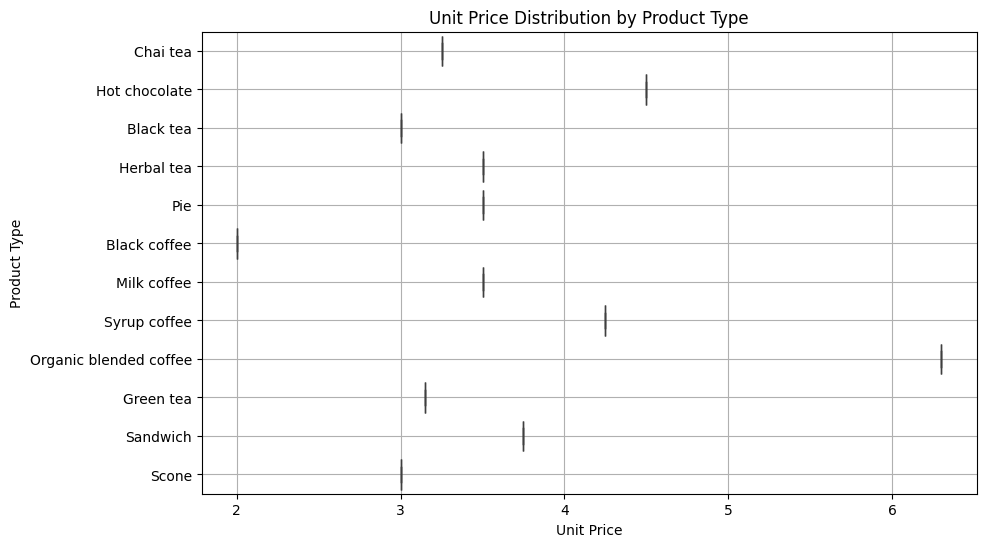

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

plt.figure(figsize=(10, 6))
sns.boxplot(x='unit_price', y='product_type', data=df)
plt.title('Unit Price Distribution by Product Type')
plt.xlabel('Unit Price')
plt.ylabel('Product Type')
plt.grid(True)
plt.show()



In [6]:
# Since the prices are fixed per product type, we can simplify the representation by directly associating
# each product type with its unit price, essentially reducing the information to a unique list.

# Create a simplified DataFrame associating product types with their unique unit price
unique_prices_per_product_type = df[['product_type', 'unit_price']].drop_duplicates().sort_values(by='product_type')

unique_prices_per_product_type.reset_index(drop=True, inplace=True)

unique_prices_per_product_type


,product_type,unit_price
0,Black coffee,2.00
1,Black tea,3.00
2,Chai tea,3.25
3,Green tea,3.15
4,Herbal tea,3.50
5,Hot chocolate,4.50
6,Milk coffee,3.50
7,Organic blended coffee,6.30
8,Pie,3.50
9,Sandwich,3.75


In [7]:
# Calculate the total revenue by summing up the revenue per transaction across all transactions
df['revenue_per_transaction'] = df['transaction_qty'] * df['unit_price']
total_revenue = df['revenue_per_transaction'].sum()
total_transactions = df['transaction_qty'].sum()
average_revenue_per_transaction = total_revenue / total_transactions
average_revenue_per_transaction


3.7876586123110147

In [8]:
df['transaction_qty'].sum()

14816.0

In [9]:
# Sum the revenue per product category
total_revenue_per_category = df.groupby('product_category')['revenue_per_transaction'].sum()

total_revenue_per_category


product_category
Bakery       12307.00
Chocolate    16978.50
Coffee       14889.85
Tea          11942.60
Name: revenue_per_transaction, dtype: float64